In [9]:
using Distributions, Gadfly, DataFrames, PyPlot

In [370]:
# first sampling method
# extends Scenario B of Gopalan. et al. (2016)
# also extends spatial 1 dim curve of Cabreros & Storey (2017)
# σ2 determines a curvature

n = 10000; r = 3; σ = 0.5;
function sample_data(n,r; scenario = 1, σ2 = 0.5, mixture_proportion = [5;4;1])
    if scenario == 1
        π_true = pdf.(Normal.((1:r)',σ2),linspace(0,r+1,n)) +
        pdf.(Normal.((r+1:2*r)',σ2),linspace(0,r+1,n)) +
        pdf.(Normal.((-r+1:0)',σ2),linspace(0,r+1,n));
        π_true = π_true ./ sum(π_true,2);
    end
    
    if scenario == 2
        α1 = ones(r) * 0.1;
        α2 = ones(r) * 0.5;
        α3 = ones(r) * 1;
        π_true = [rand.(Dirichlet(α1),Int(n/10) * mixture_proportion[1])';
                 rand.(Dirichlet(α2),Int(n/10) * mixture_proportion[2])';
                 rand.(Dirichlet(α3),Int(n/10) * mixture_proportion[3])']
    end
    
    if scenario == 3
        π_true = [rand.(Dirichlet([10;1;0.1]),Int(n/10) * mixture_proportion[1])';
                 rand.(Dirichlet([2;1;0.5]),Int(n/10) * mixture_proportion[2])';
                 rand.(Dirichlet([1;1;1]),Int(n/10) * mixture_proportion[3])']
        
    end
    
    return π_true
end

sample_data (generic function with 1 method)

In [124]:
π_true = sample_data(n,r; σ2 = σ2);
df = DataFrame(x = repeat(1:n, outer = r), y = π_true[:], col = repeat(["1";"2";"3"], inner = n))
F = Gadfly.plot(df, x=:x, y=:y, color=:col, Geom.bar(position=:stack),
                Coord.Cartesian(xmax = n, ymax = 1))
F |> SVG("Simulate_Data_fig1.svg");

![](Simulate_Data_fig1.svg?sanitize=true)

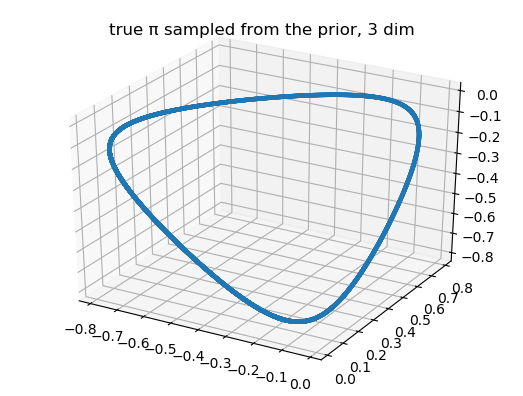

PyObject Text(0.5,0.92,u'true \u03c0 sampled from the prior, 3 dim')

In [105]:
PyPlot.scatter3D(-π_true[:,1],π_true[:,2],-π_true[:,3], s = 5)
PyPlot.title("true π sampled from the prior, 3 dim")

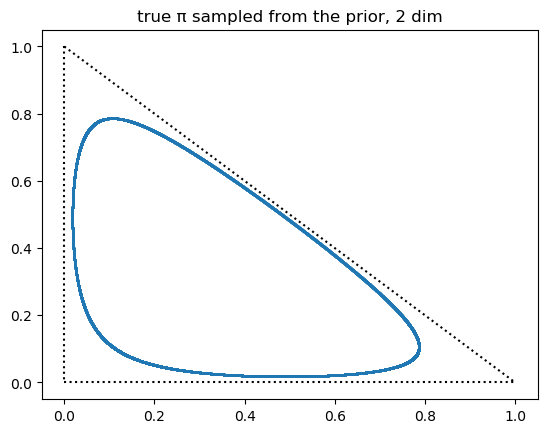

PyObject Text(0.5,1,u'true \u03c0 sampled from the prior, 2 dim')

In [115]:
PyPlot.scatter(π_true[:,1],π_true[:,2], s = 1); PyPlot.plot((0,1),(1,0), c = :black, linestyle = :dotted);
PyPlot.plot((0,1),(0,0), c = :black, linestyle = :dotted);
PyPlot.plot((0,0),(1,0), c = :black, linestyle = :dotted)
PyPlot.title("true π sampled from the prior, 2 dim")

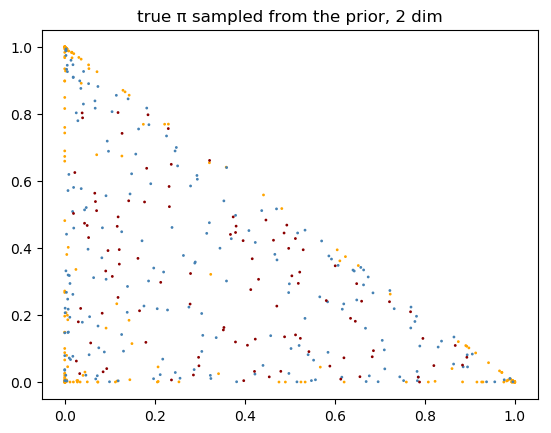

PyObject Text(0.5,1,u'true \u03c0 sampled from the prior, 2 dim')

In [363]:
n = 5000; r = 3;
srand(10)
π_true = sample_data(n,r; scenario = 2, mixture_proportion = [4;4;2]);
pind = 1:10:n; n2 = length(pind);
col = [repeat([:orange],inner = 4 * Int(n/10));
        repeat([:steelblue],inner = 4 * Int(n/10));
        repeat([:darkred],inner = 2 * Int(n/10))]
PyPlot.scatter(π_true[pind,1],π_true[pind,2], s = 1, c = col[pind])
PyPlot.title("true π sampled from the prior, 2 dim")

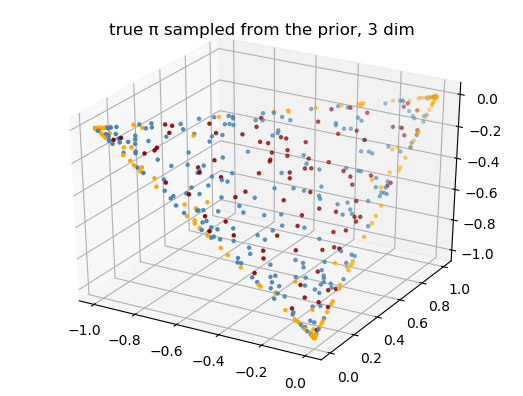

PyObject Text(0.5,0.92,u'true \u03c0 sampled from the prior, 3 dim')

In [366]:
PyPlot.scatter3D(-π_true[pind,1],π_true[pind,2],-π_true[pind,3], s = 5, color = col[o[pind]])
PyPlot.title("true π sampled from the prior, 3 dim")

In [364]:
#π_true = sortrows(π_true, rev = true)
o = sortperm(round(π_true[:,2] * 1e4 + π_true[:,1] * 2e4,4), rev = true)
π_true = π_true[o,:];
#o = sortperm(sum(cumsum(π_true[:,[3;1;2]],2),2)[:], rev = true);
#π_true = π_true[o,:];

#o = sortperm(round(-π_true[1:500,2] * 1e4 + π_true[1:500,1] * 1e4,4), rev = true)
#π_true[1:500,:] = π_true[1:500,:][o,:]
#o = sortperm(round(-π_true[501:900,2] * 1e4 + π_true[501:900,1] * 1e4,4), rev = true)
#π_true[501:900,:] = π_true[501:900,:][o,:]
#o = sortperm(round(-π_true[901:1000,2] * 1e4 + π_true[901:1000,1] * 1e4,4), rev = true)
#π_true[901:1000,:] = π_true[901:1000,:][o,:]
set_default_plot_size(40cm,10cm)
df = DataFrame(x = repeat(1:n2, outer = r), y = π_true[pind,:][:], col = repeat(["1";"2";"3"], inner = n2))
F = Gadfly.plot(df, x=:x, y=:y, color=:col, Geom.bar(position=:stack),
                Coord.Cartesian(xmax = n2, ymax = 1))
F |> SVG("Simulate_Data_fig2.svg");

![](Simulate_Data_fig2.svg?sanitize=true)

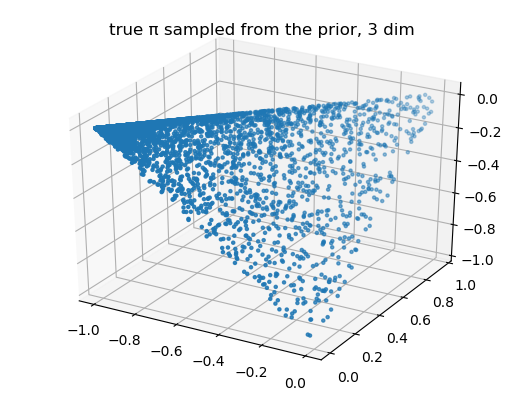

PyObject Text(0.5,0.92,u'true \u03c0 sampled from the prior, 3 dim')

In [381]:
n = 5000; r = 3;
srand(10)
π_true = sample_data(n,r; scenario = 3, mixture_proportion = [6;3;1]);
PyPlot.scatter3D(-π_true[:,1],π_true[:,2],-π_true[:,3], s = 5)
PyPlot.title("true π sampled from the prior, 3 dim")